In [206]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score,classification_report, recall_score, f1_score, cohen_kappa_score
from tensorflow.keras import backend as K
from tensorflow.keras import mixed_precision
import seaborn as sns
%matplotlib inline

### 1- Understanding The Data

-  Fixed acidity: acids are major wine properties and contribute greatly to the wine’s taste. Usually, the total acidity is divided into two groups:the volatile acids and the nonvolatile or fixed acids. Among the fixed acids that you can find in wines are the following: tartaric, malic, citric, and succinic. This variable is expressed in g(tartaricacid)/dm3 in the data sets.

-  Volatile acidity: the volatile acidity is basically the process of wine turning into vinegar. In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. In these data sets, the volatile acidity is expressed in g(aceticacid)/dm3.

- Citric acid is one of the fixed acids that you’ll find in wines. It’s expressed in g/dm3 in the two data sets.

- Residual sugar typically refers to the sugar remaining after fermentation stops, or is stopped. It’s expressed in g/dm3 in the red and white data.

- Chlorides can be a significant contributor to saltiness in wine. Here, you’ll see that it’s expressed in g(sodiumchloride)/dm3.

- Free sulfur dioxide: the part of the sulfur dioxide that is added to a wine and that is lost into it is said to be bound, while the active part is said to be free. The winemaker will always try to get the highest proportion of free sulfur to bind. This variable is expressed in mg/dm3 in the data.

- Total sulfur dioxide is the sum of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg/dm3. There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. For the US, the legal limits are set at 350mg/L, and for Australia, this is 250mg/L.

- Density is generally used as a measure of the conversion of sugar to alcohol. Here, it’s expressed in g/cm3.

- pH or the potential of hydrogen is a numeric scale to specify the acidity or basicity the wine. As you might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

- Sulfates are to wine as gluten is to food. You might already know sulfites from the headaches that they can cause. They are a regular part of the winemaking around the world and are considered necessary. In this case, they are expressed in g(potassiumsulphate)/dm3.

- Alcohol: wine is an alcoholic beverage, and as you know, the percentage of alcohol can vary from wine to wine. It shouldn’t be surprised that this variable is included in the data sets, where it’s expressed in % vol.

- Quality: wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual number is the median of at least three evaluations made by those same wine experts.


### Loading The Data

In [123]:
df=pd.read_csv('https://raw.githubusercontent.com/becodeorg/GNT-Arai-2.31/master/content/additional_resources/datasets/Wine%20Quality/wine.csv?token=AUDYZYYNMMIDYPJJ34NKHN3BICUH4')

### 2- Data Exploration

- Are the data types correct?
- Did all the rows come through? 
- Are there any null values that you should take into account when you’re cleaning up the data?
- You might also want to check out your data with more than just info():

In [124]:
df.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
#df.tail()

In [126]:
#df.sample()

In [127]:
df.shape

(6497, 13)

#### Note that 
df.describe() offers some summary statistics about the data that can help to assess the data quality. You see that some of the variables have a lot of difference in their min and max values. This is something that you’ll deal with later, but at this point, it’s just imperative to be aware of this.

In [128]:
df.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##### info and isnull()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [130]:
df.columns.tolist()

['index',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### 3- Visualizing The Data

In [131]:
# plt.hist(df.alcohol, 10, facecolor='red', alpha=0.5)

# fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
# ax[0].set_ylim([0, 2000])
# ax[0].set_xlabel("Alcohol in % Vol")
# ax[0].set_ylabel("Frequency")

# hist.title("Distribution of Alcohol in % Vol")

# plt.show()

In [132]:
#print(np.histogram(df.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

<AxesSubplot:>

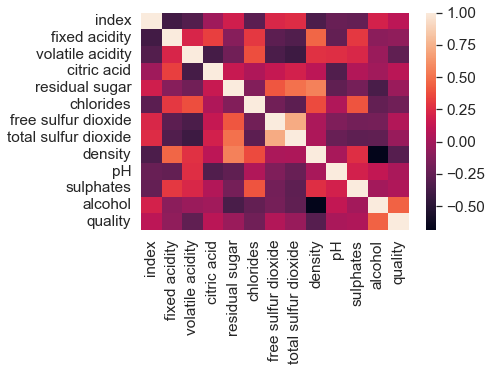

In [133]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [134]:
# split into input (X) and output (y) variables
X = df.drop(columns=['quality', 'index'], axis=1)
y = df['quality']



In [135]:
good_wine=[7,8,9]
bad_wine=[3,4,5,6]

In [136]:
y=y.replace(to_replace=good_wine, value=1)
y=y.replace(to_replace=bad_wine, value=0)

In [137]:
y.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [138]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Standardize The Data

In [139]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

In [140]:
# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [141]:
X_train

array([[-7.51682345e-02, -1.33696832e+00,  8.58590678e-04, ...,
         1.14171148e+00, -8.17593880e-01, -9.07381844e-01],
       [-3.09279988e-01, -1.33696832e+00, -1.37533507e-01, ...,
        -1.10015025e-01, -1.23015908e+00, -4.88519150e-01],
       [ 3.93055272e-01,  2.71544591e-01,  5.54426980e-01, ...,
        -2.35187675e-01, -1.43644168e+00,  2.02465702e+00],
       ...,
       [-6.21428992e-01,  2.09678710e-01, -8.29493994e-01, ...,
         1.40330276e-01, -6.80072147e-01, -8.23609305e-01],
       [-5.43391741e-01, -4.70845982e-01,  1.24638747e+00, ...,
        -2.35187675e-01, -4.05028680e-01, -8.23609305e-01],
       [ 2.86901658e-03,  1.75632574e+00, -1.79823868e+00, ...,
         1.83016106e+00,  7.62973863e-02, -8.23609305e-01]])

In [170]:
# define the keras model
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [171]:
# # define the keras model
# model = Sequential()
# model.add(Dense(12, activation='relu', inout))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(1, activation='sigmoid'))

In [172]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 9         
Total params: 2,577
Trainable params: 2,577
Non-trainable params: 0
_________________________________________________________________


[array([[-0.13113427,  0.07205139, -0.09235892, ...,  0.09913491,
          0.05342169,  0.19077666],
        [-0.04565819, -0.07764359, -0.08482001, ..., -0.04610498,
          0.02173428, -0.13269462],
        [-0.16109312,  0.1479538 ,  0.13263239, ...,  0.04454936,
          0.02783619, -0.10368693],
        ...,
        [ 0.09374075,  0.01159203,  0.10259463, ..., -0.02585155,
         -0.05436057, -0.15277103],
        [ 0.07287945,  0.10932843, -0.07337505, ...,  0.01975076,
          0.2017353 , -0.05916482],
        [-0.03582478,  0.0351738 ,  0.17042623, ..., -0.02775303,
         -0.06587794,  0.07442151]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

### Compile and Fit

In [173]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [209]:
# fit the keras model on the dataset
model.fit(X_train, y_train,epochs=100, batch_size=128, verbose=1)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8396
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8405
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8405
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8408
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8419
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8451
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8465
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8447
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8479
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8451
Epoch 11/

Epoch 82/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.8835
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8805
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8847
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.8858
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8828
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8828
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.8869
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8890
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8860
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.8897


### Predict Values

In [175]:
y_pred = model.predict(X_test)

In [188]:
print(y_pred[:5])

print(y_pred[:5].round())

[[0.3708313 ]
 [0.00343263]
 [0.717017  ]
 [0.05689576]
 [0.02238867]]
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [177]:
y_test[:5]

3103    1
1419    0
4761    1
4690    0
4032    0
Name: quality, dtype: int64

### Evaluate Model

In [178]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

68/68 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8359
[0.34754475951194763, 0.8358974456787109]


In [196]:
# Confusion matrix use tensorflow because the normal confusion matrix doesnt accept both binary and non binary inputs 
tf.math.confusion_matrix(y_test, y_pred.round())
# View confusion matrix for test data and predictions and slice into four pieces
confusion = tf.math.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

tf.Tensor(
[[1735    0]
 [ 410    0]], shape=(2, 2), dtype=int32)


In [197]:
#tf.keras.metrics.Precision(y_test, y_pred)

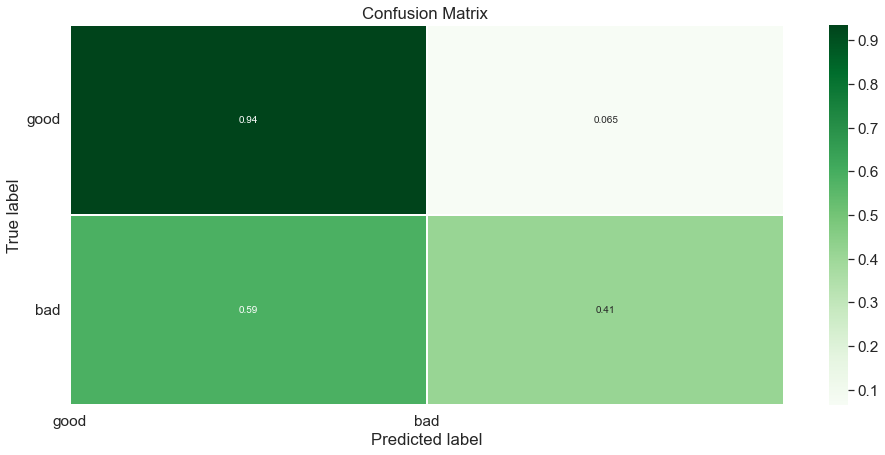

In [215]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred.round())
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['good', 'bad']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix ')
plt.show()

In [208]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred.round()))
#tf.keras.wrappers.scikit_learn.KerasClassifier(y_test, y_pred.round())

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1735
           1       0.60      0.41      0.49       410

    accuracy                           0.84      2145
   macro avg       0.74      0.68      0.70      2145
weighted avg       0.82      0.84      0.82      2145

